# Notebook MLA Project - Fader Networks

**Authors:** Adrien PETARD, Robin LEVEQUE, Théo MAGOUDI, Eliot CHRISTON

**Group:** 11


# Table of Contents
1. [Introduction](#1-introduction)
2. [Imports](#2-imports)
3. [Dataset](#3-dataset)
4. [Train](#4-train)
5. [Make inference](#5-make-inference)
6. [Results](#6-results)
7. [Conclusion](#7-conclusion)
8. [Annexes](#8-annexes)
    - [8.1 How to connect the jupyter server and Vscode, and how to use/understand it:](#81-how-to-connect-the-jupyter-server-and-vscode-and-how-to-useunderstand-it)
    - [8.2 Data exploration:](#82-data-exploration)
        - [8.2.0 Presentation](#820-presentation)
        - [8.2.1 Annotations](#821-annotations)
            - [Identity](#identity)
            - [Attributes](#attributes)
            - [Bounding Boxes](#bounding-boxes)
            - [Landmarks](#landmarks)
        - [8.2.2 Evaluation](#822-evaluation)
        - [8.2.3 Images](#823-images)
    - [8.3 Our point of comparison is the Fader Networks paper (https://arxiv.org/pdf/1706.00409.pdf)](#82-our-point-of-comparison-is-the-fader-networks-paper-httpsarxivorgpdf170600409pdf)
    - [8.4 Train your own models](#63-train-your-own-models)
        - [8.4.1 Train a classifier](#631-train-a-classifier)
        - [8.4.2 Train a fader Network](#632-train-a-fader-network)

___
## 1. Introduction

Welcome to our presentation notebook!
Here you will find the code used to train and test our model but also interesting results and discussions about our work.
At the end are presented some annexes that we used to help us during the project.

#### *Who are we?*
We are a group of 4 students from Sorbonne University in Paris, France.
We are currently in the second year of the Master's degree in Robotics and Artificial Intelligence.

Keep in mind that this notebook is not meant to be run from top to bottom but rather to be used as a reference to understand our work.

In [1]:
%cd
%cd tests/MLA_Projet_2023/

/home/notregroupe
/home/notregroupe/tests/MLA_Projet_2023


___
## 2. Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

___
## 3. Dataset

### CelebA

A comprehensive notebook is available for the dataset exploration, [here_TODO](blabla)
We used the CelebA dataset, which is available at http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

![alt text](data/celeba_examples.png "CelebA")

We processed the dataset to make the sizes match the paper's requirements

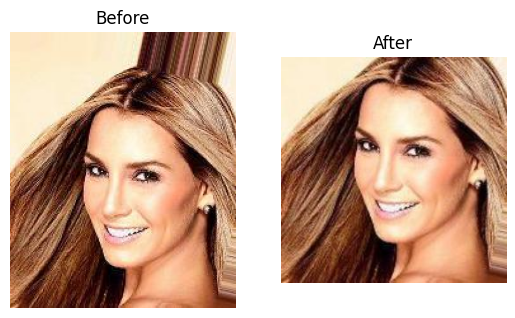

In [3]:
image_before = plt.imread("data/Img/000001.jpg")
image_after = plt.imread("data/Img_processed/000001.jpg")

plt.subplot(1, 2, 1)
plt.imshow(image_before)
plt.title("Before")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_after)
plt.title("After")
plt.axis("off")

plt.show()

### Etu

An other dataset: contributors' faces

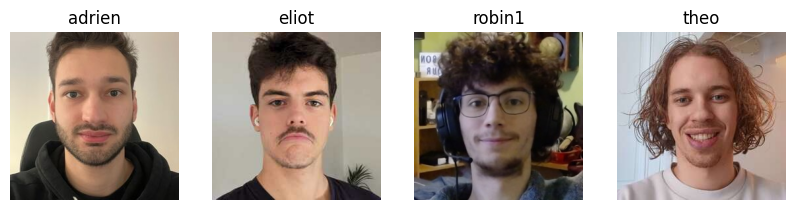

In [4]:
images = [
    "data/Img_etu/adrien.jpg",
    "data/Img_etu/eliot.jpg",
    "data/Img_etu/robin1.jpg",
    "data/Img_etu/theo.jpg"
]

plt.figure(figsize=(10, 4))
for i, image in enumerate(images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(plt.imread(image))
    plt.axis("off")
    plt.title(image.split("/")[-1].split(".")[0])
plt.show()

___
## 4. Train

If you want to train your own models, you can use the following commands:

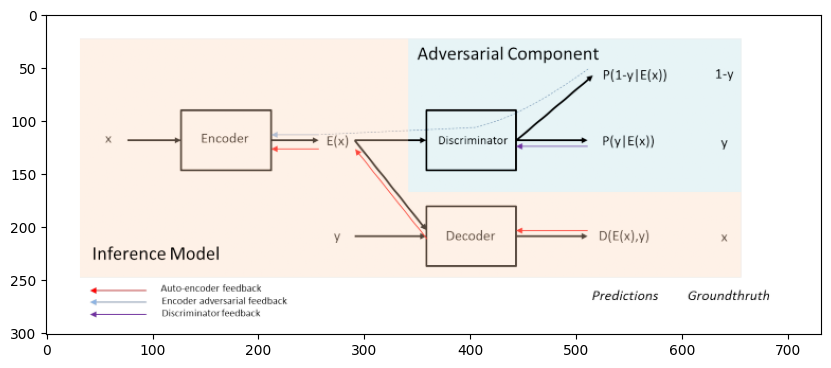

In [5]:
img = plt.imread('data/Model.PNG')
figure = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [6]:
! python train.py 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:895.)
  return F.conv2d(input, weight, bias, self.stride,
Using device: cuda
^C
Traceback (most recent call last):
  File "/home/notregroupe/tests/MLA_Projet_2023/train.py", line 39, in <module>
    dataset = get_celeba_dataset()
  File "/home/notregroupe/tests/MLA_Projet_2023/src/ImgDataset.py", line 9, in get_celeba_dataset
    return ImgDataset(attributes_csv_file='data/Anno/list_attr_celeba.txt', img_root_dir='data/Img_processed', transform=None)
  File "/home/notregroupe/tests/MLA_Projet_2023/src/ImgDataset.py", line 30, in __init__
    self.attributes_df = pd.read_csv(attributes_csv_file, sep=" ", header=1)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func

If you want to custom your training, you have to follow the steps detailed in the README.md file.

___
## 5. Make Inference

If you want to infer images based on pretrained models, you can use the following commands:

In [ ]:
! python make_inference.py

If you want to custom your inference, you have to follow the steps detailed in the README.md file.

___
## 6. results

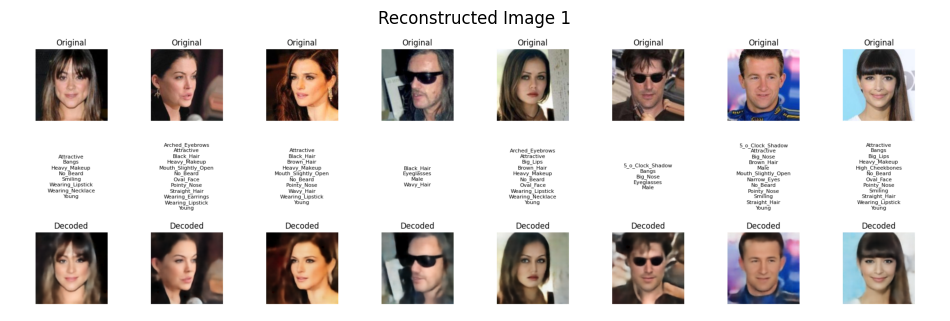

In [7]:
# Load the image
image_reconstructed_1 = plt.imread("Logs/start_2023_12_17_14-42-44_logs/plots/epoch_47.png")

# Create a figure
plt.figure(figsize=(12, 6))

# Display the image
plt.imshow(image_reconstructed_1)
plt.title("Reconstructed Image 1")  # Adjust the title accordingly
plt.axis("off")
plt.show()

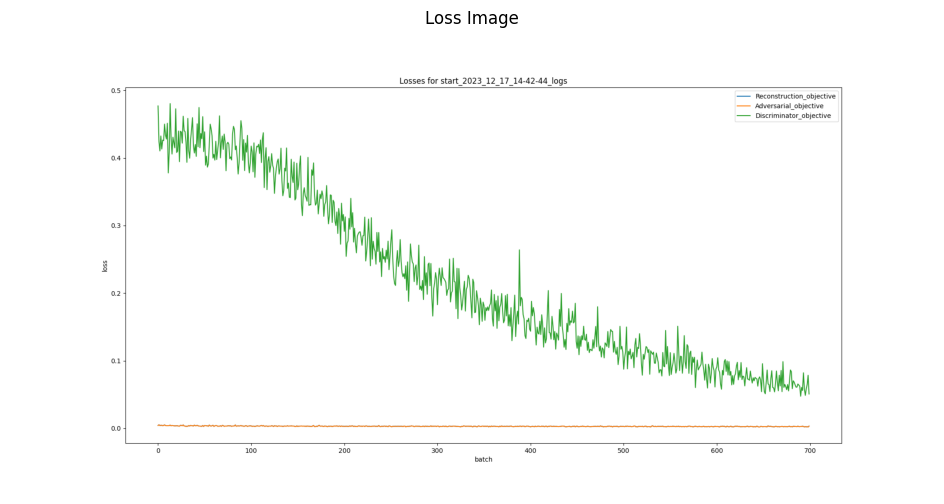

In [8]:
# Discrimination Objective
# Load the image
loss_image = plt.imread("Logs/start_2023_12_17_14-42-44_logs/plots/losses.png")

# Create a figure
plt.figure(figsize=(12, 6))

# Display the image
plt.imshow(loss_image)
plt.title("Loss Image")  # Adjust the title accordingly
plt.axis("off")
plt.show()

![alt text](Logs/start_2023_12_17_14-42-44_logs/inference/Etuattribute_Eyeglasses.png "Etuattribute_Eyeglasses")

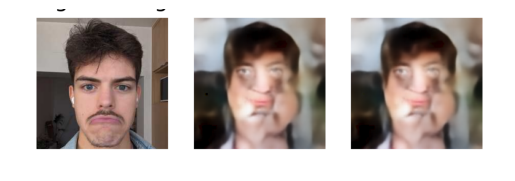

In [9]:
img_eliot = plt.imread('Logs/start_2023_12_15_11-17-28_logs/inference/attribute_21.png')
plt.imshow(img_eliot)
plt.xlim(0, 1150)
plt.ylim(1900, 1525)
plt.axis("off")
plt.show()

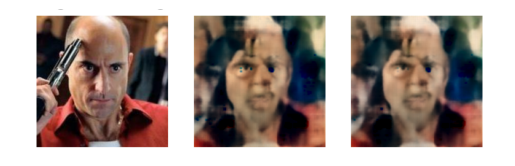

In [10]:
img_pistolet = plt.imread('Logs/start_2023_12_17_14-42-44_logs/inference/CelebAattribute_Blond_Hair.png')
plt.imshow(img_pistolet)
plt.xlim(0, 1150)
plt.ylim(1200, 860)
plt.axis("off")
plt.show()

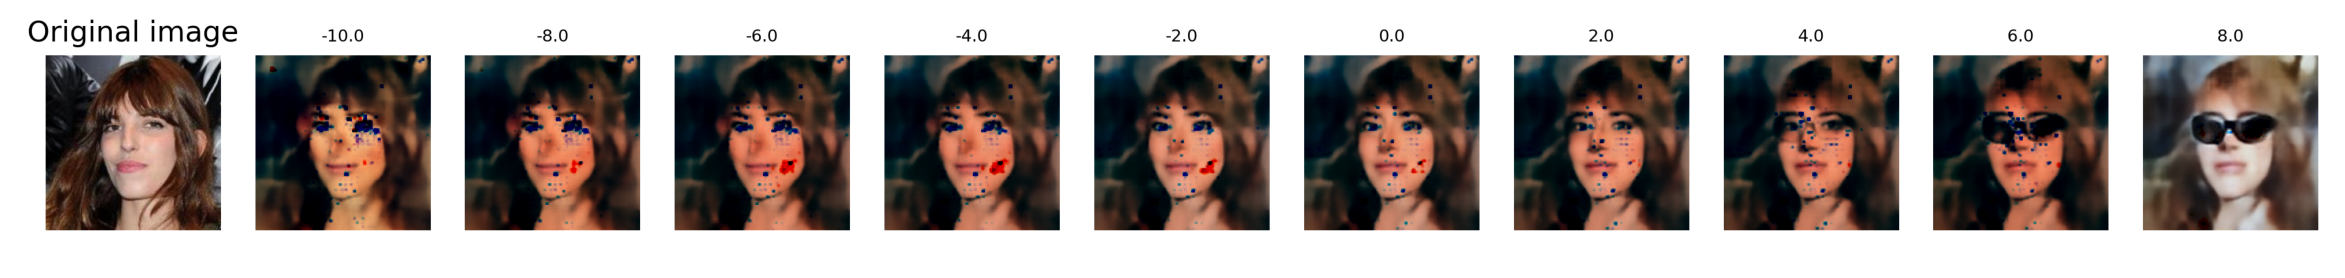

In [11]:
img_femme = plt.imread('Logs/start_2023_12_17_14-42-44_logs/inference/CelebAattribute_Eyeglasses.png')
figure = plt.figure(figsize=(30, 5))
plt.imshow(img_femme)
plt.ylim(2200, 1750)
plt.axis("off")
plt.show()

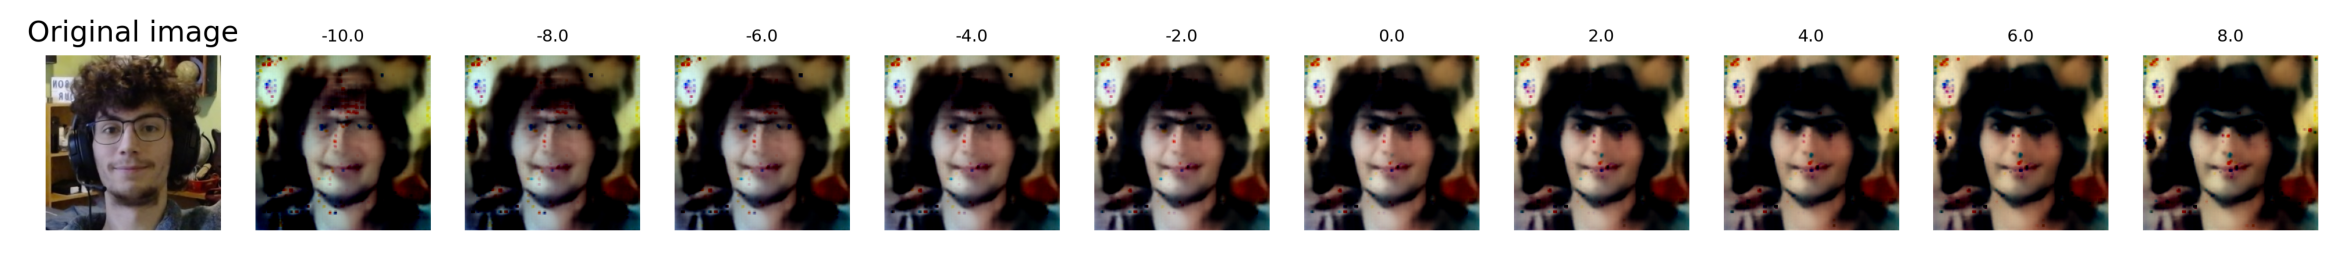

In [12]:
img_robin = plt.imread('Logs/start_2023_12_17_14-42-44_logs/inference/Etuattribute_Young.png')
figure = plt.figure(figsize=(30, 5))
plt.imshow(img_robin)
plt.ylim(2200, 1750)
plt.axis("off")
plt.show()

___
## 7. Conclusion

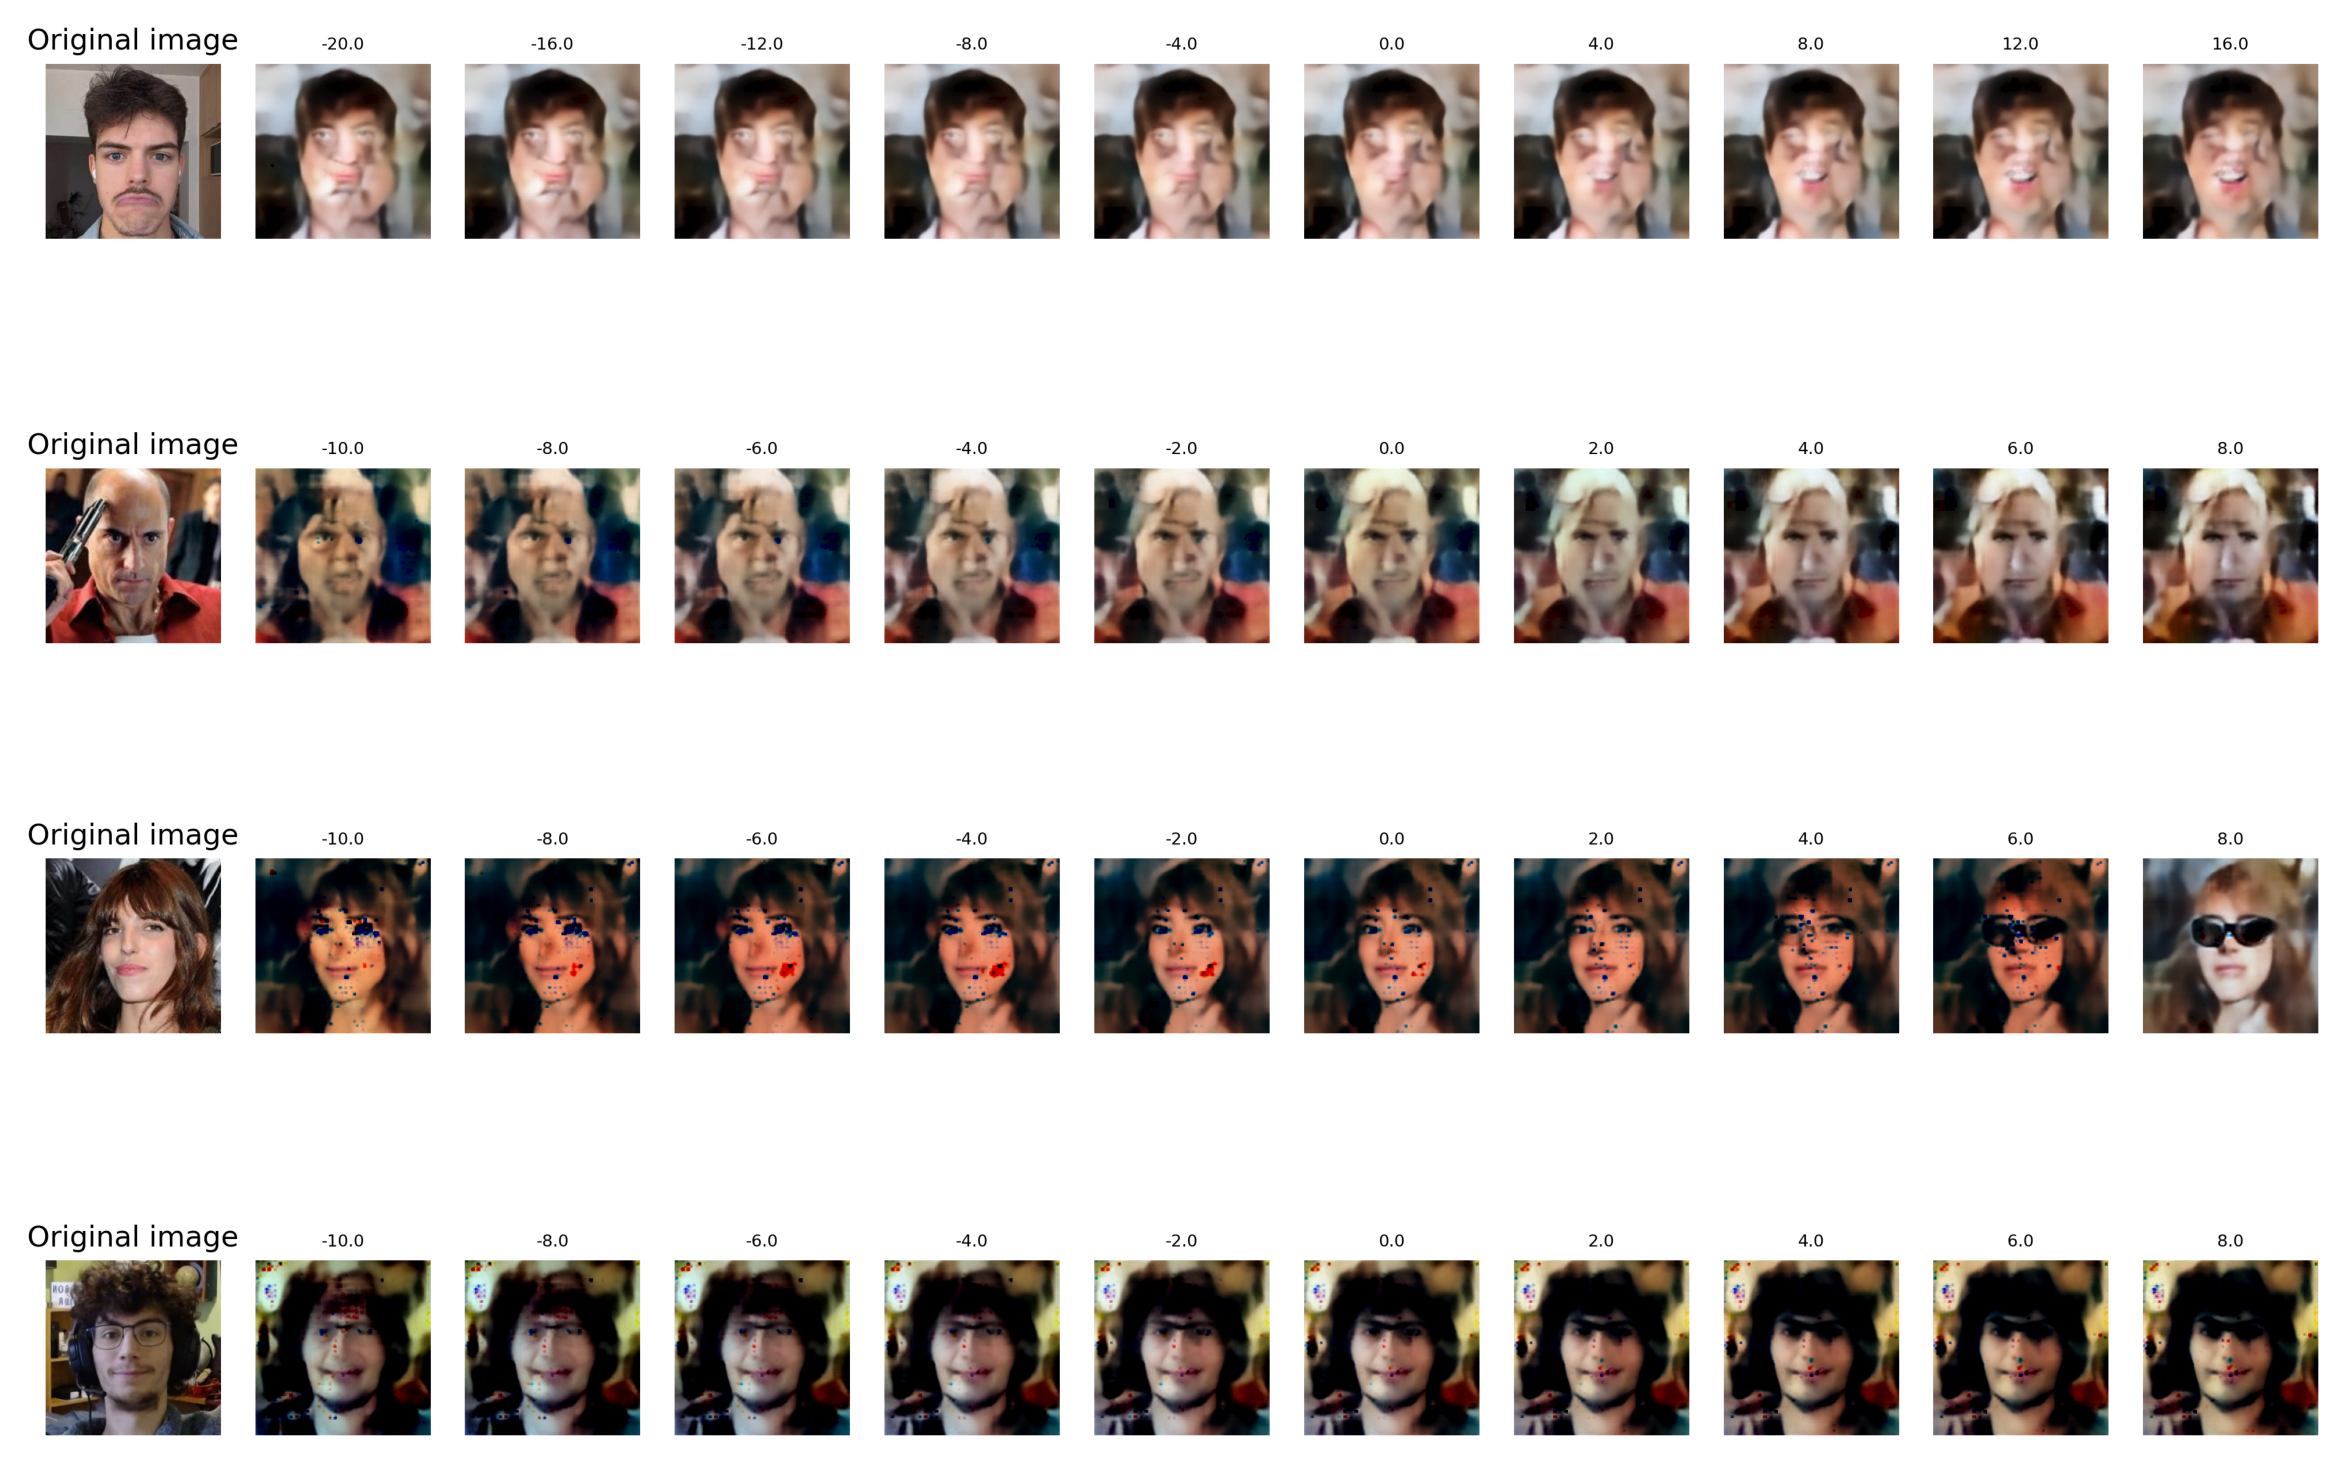

In [13]:
figure = plt.figure(figsize=(30, 20))
plt.subplot(4, 1, 1)
plt.imshow(img_eliot)
plt.ylim(1900, 1450)
plt.axis("off")

plt.subplot(4, 1, 2)
plt.imshow(img_pistolet)
plt.ylim(1200, 800)
plt.axis("off")

plt.subplot(4, 1, 3)
plt.imshow(img_femme)
plt.ylim(2200, 1750)
plt.axis("off")

plt.subplot(4, 1, 4)
plt.imshow(img_robin)
plt.ylim(2200, 1750)
plt.axis("off")

plt.show()

___
## 8. Annexes

#### 8.1 How to connect the jupyter server and Vscode, and how to use/understand it:

On this link you will find all the instructions to complete the quest of connecting your notebook to the university's server: https://code.visualstudio.com/docs/datascience/jupyter-notebooks

But to help you I will resume the steps you will go through:
- Click on the kernel you're actually using on the top right corner of the vscode window
- Click with the left click of your mouse adnd then choose "Select another kernel"
And then enter all the informations needed:

URL:    https://sdi.ppi.ingenierie.upmc.fr/gpu11

ID:     notregroupe

PWD:    notregroupe


When you are on Vscode and you create a notebook, you have the option to choose a server to which you will connect. Here, the advantage is to connect to the university server to have access to the images without downloading them, and that on our favorite environment. We can then create our notebooks or even Python files that will be executed by the notebook which is relatively educational and allows improving the communication of information and progress.


In [ ]:
# Using the % or ! in front of a command that we would usually use in the terminal, we can execute it directly in the notebook:
%cd
!ls
%ls

# Now we are going to get the files we are interested in:
%cd tests/MLA_Projet_2023/
%ls

### 8.2 Data exploration

![alt text](data/CelebA.png "CelebA")

#### 8.2.0. Presentation

The goal of this annexe is to explore the CelebA dataset and to understand how it is structured.

Here is the link to the dataset: [https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)

The data is divided into 3 folders:
- <u>**Anno** (`annotation`):</u> contains the annotations of the dataset
- <u>**Eval** (`evaluation`):</u> contains the evaluation files of the dataset
- <u>**Img** (`images`):</u> contains the images of the dataset, here we chose to use the aligned and cropped images


#### 8.2.1. Annotations

##### Identity

The identity is a number representing the person in the image. Each person has a unique identity number but can appear in multiple images.

In [ ]:
identity = pd.read_csv('data/Anno/identity_CelebA.txt', sep=" ", header=None, index_col=0)
identity.columns = ["identity_id"]
identity.index.name = "image_id"

print("The shape of the identity dataframe is: ", identity.shape)
display(identity.head())

The shape of the identity dataframe is:  (202599, 1)


identity_id
image_id               
000001.jpg         2880
000002.jpg         2937
000003.jpg         8692
000004.jpg         5805
000005.jpg         9295

In [ ]:
# here we will the identities according to their frequency
identity_counts = identity.groupby("identity_id").size().reset_index(name="count") # group by identity_id and count the number of occurences
identity_counts = identity_counts.sort_values(by="count", ascending=False) # sort by count in descending order
identity_counts = identity_counts.reset_index(drop=True) # reset the index

print("Number of identities: {}".format(len(identity_counts)), '\n')

print("Most frequent identities: ")
display(identity_counts.head()) # first 5 (default) most frequent identities
print("Least frequent identities: ")
display(identity_counts.tail()) # last 5 (default) least frequent identities

Number of identities: 10177 

Most frequent identities: 


identity_id  count
0         2820     35
1         3227     35
2         3782     35
3         3699     34
4         3745     34

Least frequent identities: 


identity_id  count
10172         9280      1
10173         9966      1
10174         7778      1
10175         1100      1
10176         8591      1

<AxesSubplot: title={'center': 'Distribution of appearances of identities'}, ylabel='Frequency'>

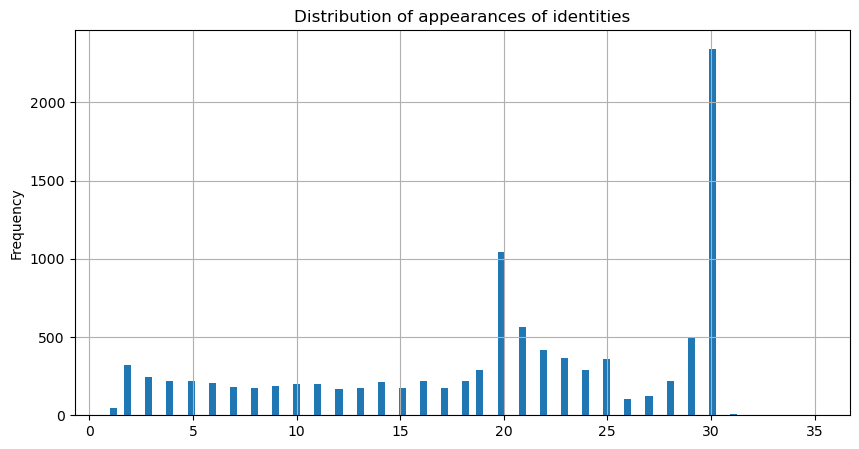

In [ ]:
# plot the distribution of appearances of identities

identity_counts["count"].plot.hist(
    bins=100, 
    figsize=(10, 5), 
    title="Distribution of appearances of identities",
    xlabel="Number of appearances",
    ylabel="Number of identities",
    grid=True,
)

Identities are mostly represented 30 times in the dataset.

___
##### Attributes

In [ ]:
attributes = pd.read_csv('data/Anno/list_attr_celeba.txt', sep=" ", header=1, index_col=0)
attributes.index.name = "image_id"
print("The shape of the attributes dataframe is: ", attributes.shape)
print("Number of attributes: {}".format(len(attributes.columns)))
display(attributes.head()) # first 5 (default) attributes

The shape of the attributes dataframe is:  (202599, 40)
Number of attributes: 40


5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
image_id                                                                     
000001.jpg                -1                1           1               -1   
000002.jpg                -1               -1          -1                1   
000003.jpg                -1               -1          -1               -1   
000004.jpg                -1               -1           1               -1   
000005.jpg                -1                1           1               -1   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  \
image_id                                                             ...   
000001.jpg    -1     -1        -1        -1          -1          -1  ...   
000002.jpg    -1     -1        -1         1          -1          -1  ...   
000003.jpg    -1     -1         1        -1          -1          -1  ...   
000004.jpg    -1     -1        -1        -1          -1          -1  ...   
000005.jpg    -1     -1         1        -1          -1          -1  ...   

            Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
image_id                                                                     
000001.jpg         -1        1              1         -1                 1   
000002.jpg         -1        1             -1         -1                -1   
000003.jpg         -1       -1             -1          1                -1   
000004.jpg         -1       -1              1         -1                 1   
000005.jpg         -1       -1             -1         -1                -1   

            Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
image_id                                                                       
000001.jpg           -1                 1                -1               -1   
000002.jpg           -1                -1                -1               -1   
000003.jpg           -1                -1                -1               -1   
000004.jpg           -1                 1                 1               -1   
000005.jpg           -1                 1                -1               -1   

            Young  
image_id           
000001.jpg      1  
000002.jpg      1  
000003.jpg      1  
000004.jpg      1  
000005.jpg      1  

[5 rows x 40 columns]

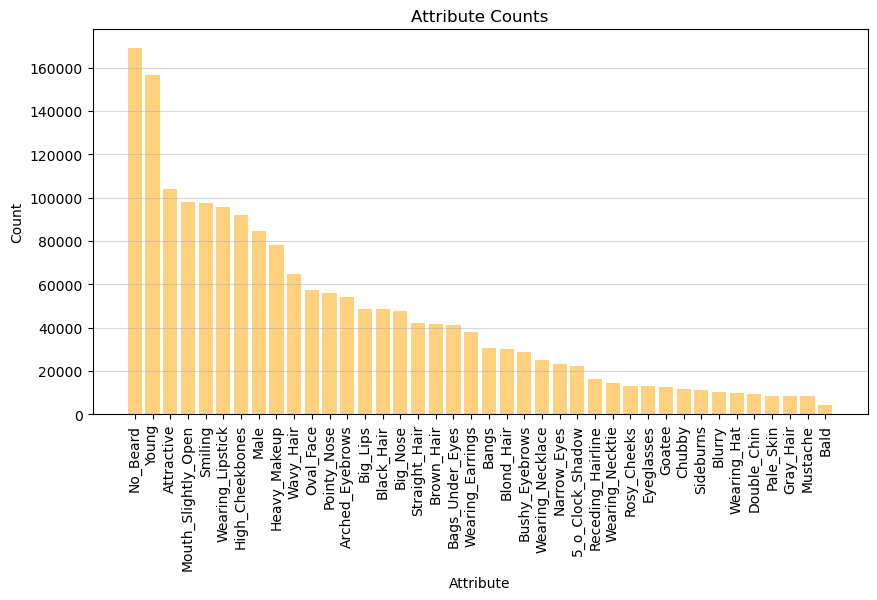

In [ ]:
binary_attributes = attributes.replace(to_replace=-1, value=0) # replace -1 with 0
attribute_counts = binary_attributes.sum(axis=0).sort_values(ascending=False) # sum each column and sort


%matplotlib inline

plt.figure(figsize=(10, 5))
plt.bar(range(len(attribute_counts)), attribute_counts, color="orange", alpha=0.5)
plt.xlabel("Attribute")
plt.ylabel("Count")
# on the x axis, we need to label the bars with the attribute names
plt.xticks(range(len(attribute_counts)), attribute_counts.index, rotation=90)
plt.grid(True, axis="y", alpha=0.5)
plt.title("Attribute Counts")
plt.show()

___
##### Bounding Boxes

The bounding boxes are the coordinates of the face in the image. They are represented by 4 numbers: x, y, width and height.

In [ ]:
bounding_boxes = pd.read_csv('data/Anno/list_bbox_celeba.txt', sep=" ", header=1, index_col=0)
bounding_boxes.index.name = "image_id"
print("The shape of the bounding boxes dataframe is: ", bounding_boxes.shape)
display(bounding_boxes.head()) # first 5 (default) bounding boxes

The shape of the bounding boxes dataframe is:  (202599, 4)


x_1  y_1  width  height
image_id                           
000001.jpg   95   71    226     313
000002.jpg   72   94    221     306
000003.jpg  216   59     91     126
000004.jpg  622  257    564     781
000005.jpg  236  109    120     166

___
##### Landmarks

The landmarks are the coordinates of 5 points on the face: left eye, right eye, nose, left mouth and right mouth.

There are 2 data_files for the landmarks: `list_landmarks_align_celeba.txt` and `list_landmarks_celeba.txt`. The first one contains the landmarks for the aligned images and the second one for the non-aligned images.

In [ ]:
landmarks_aligned = pd.read_csv('data/Anno/list_landmarks_align_celeba.txt', sep=" ", header=1, index_col=0)
landmarks_aligned.index.name = "image_id"
print("The shape of the landmarks_aligned dataframe is: ", landmarks_aligned.shape)
display(landmarks_aligned.head()) # first 5 (default) landmarks

The shape of the landmarks_aligned dataframe is:  (202599, 10)


lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  nose_y  \
image_id                                                                   
000001.jpg         69        109         106         113      77     142   
000002.jpg         69        110         107         112      81     135   
000003.jpg         76        112         104         106     108     128   
000004.jpg         72        113         108         108     101     138   
000005.jpg         66        114         112         112      86     119   

            leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
image_id                                                          
000001.jpg           73          152           108           154  
000002.jpg           70          151           108           153  
000003.jpg           74          156            98           158  
000004.jpg           71          155           101           151  
000005.jpg           71          147           104           150

In [ ]:
landmarks_wild = pd.read_csv('data/Anno/list_landmarks_celeba.txt', sep=" ", header=1, index_col=0)
landmarks_wild.index.name = "image_id"
print("The shape of the landmarks_wild dataframe is: ", landmarks_wild.shape)
display(landmarks_wild.head()) # first 5 (default) landmarks

The shape of the landmarks_wild dataframe is:  (202599, 10)


lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  nose_y  \
image_id                                                                   
000001.jpg        165        184         244         176     196     249   
000002.jpg        140        204         220         204     168     254   
000003.jpg        244        104         264         105     263     121   
000004.jpg        796        539         984         539     930     687   
000005.jpg        273        169         328         161     298     172   

            leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
image_id                                                          
000001.jpg          194          271           266           260  
000002.jpg          146          289           226           289  
000003.jpg          235          134           251           140  
000004.jpg          762          756           915           756  
000005.jpg          283          208           323           207

___
___
#### 8.2.2. Evaluation

The dataset is divided into 3 parts: train, validation and test. The train and validation sets are used to train the model and the test set is used to evaluate the model.

The split is defined in the `list_eval_partition.txt` file. It contains the identity number and the split number (0 for train, 1 for validation and 2 for test).

In [ ]:
list_eval_partition = pd.read_csv('data/Eval/list_eval_partition.txt', sep=" ", index_col=0)
list_eval_partition.index.name = "image_id"
list_eval_partition.columns = ["partition"]
print("The shape of the list_eval_partition dataframe is: ", list_eval_partition.shape)
display(list_eval_partition.head()) # first 5 (default) partitions

The shape of the list_eval_partition dataframe is:  (202598, 1)


partition
image_id             
000002.jpg          0
000003.jpg          0
000004.jpg          0
000005.jpg          0
000006.jpg          0

Number of training images: 162769
Number of validation images: 19867
Number of test images: 19962


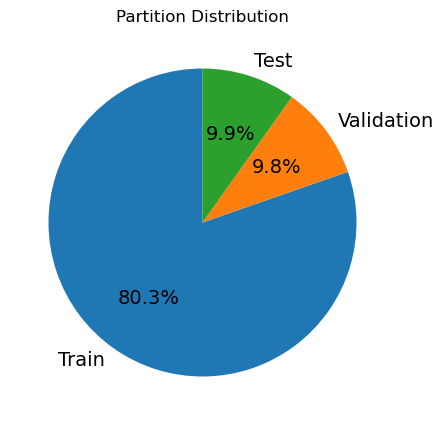

In [ ]:
n_train = len(list_eval_partition[list_eval_partition["partition"] == 0])
n_val = len(list_eval_partition[list_eval_partition["partition"] == 1])
n_test = len(list_eval_partition[list_eval_partition["partition"] == 2])

print("Number of training images: {}".format(n_train))
print("Number of validation images: {}".format(n_val))
print("Number of test images: {}".format(n_test))

# plot camembert
plt.figure(figsize=(5, 5))
plt.pie(
    [n_train, n_val, n_test], 
    labels=["Train", "Validation", "Test"], 
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 14}
)
plt.title("Partition Distribution")
plt.show()

___
___
#### 8.2.3. Images

The Img folder contains all the images of the dataset. let's take a look at some of them.

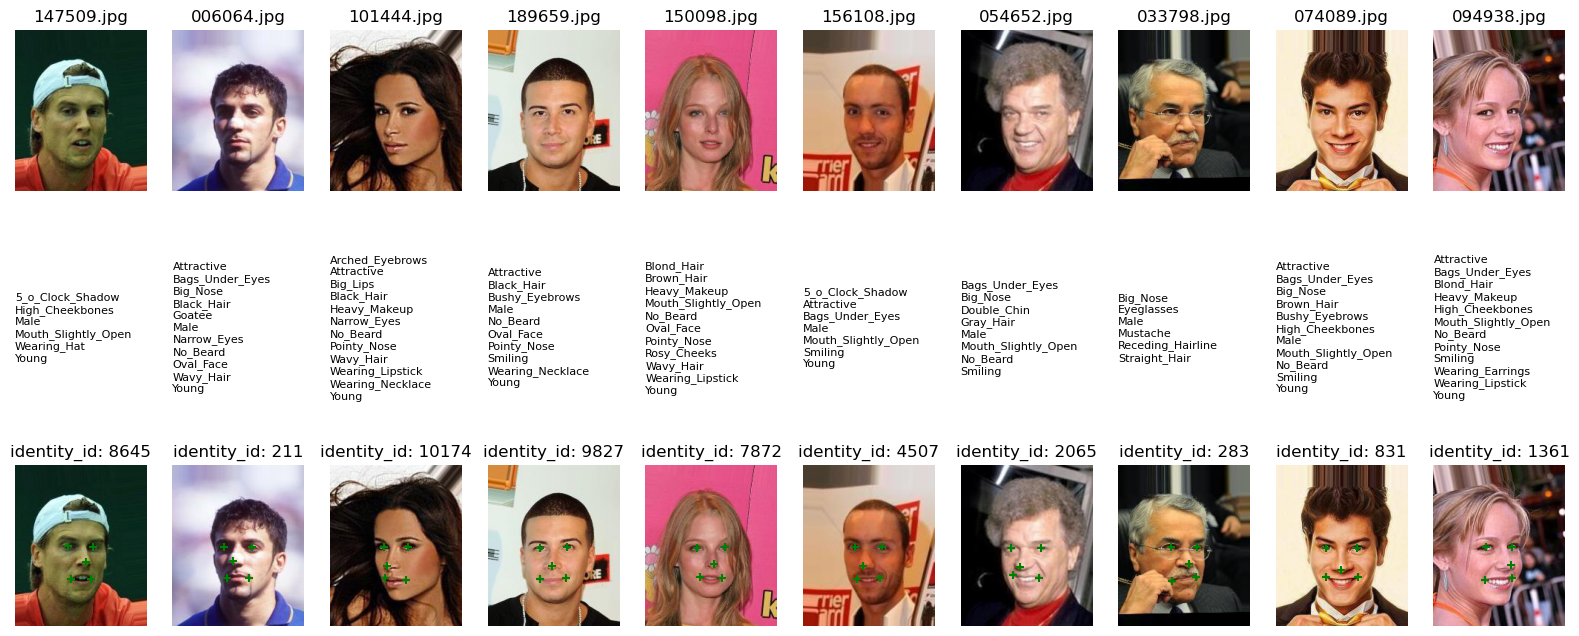

In [ ]:
nb_images = 10
fig, axes = plt.subplots(3, nb_images, figsize=(20, 8))
list_random_images = list_eval_partition.sample(nb_images).index
for i, image_id in enumerate(list_random_images):
    img = plt.imread("data/Img/" + image_id)
    axes[0][i].imshow(img)
    axes[0][i].axis("off")
    axes[0][i].set_title(image_id)
    
    # get the attributes of the image and display them
    attributes = binary_attributes.loc[image_id]
    list_attributes = attributes[attributes == 1].index
    
    axes[1][i].axis("off")
    axes[1][i].text(0, 0.5, "\n".join(list_attributes), fontsize=8, ha="left", va="center")
    
    # adding identity
    identity_id = identity.loc[image_id].values[0]
    axes[2][i].imshow(img)
    axes[2][i].axis("off")
    axes[2][i].set_title("identity_id: {}".format(identity_id))
    
    # adding landmarks
    landmarks = landmarks_aligned.loc[image_id]
    axes[2][i].scatter(landmarks[0::2], landmarks[1::2], marker="+", c="green")
    
    
plt.show()

#### 8.3 Our point of comparison is the Fader Networks paper (https://arxiv.org/pdf/1706.00409.pdf)

In [ ]:
# We are going to preprocess the images, that is to say:

%cd
%ll
print("\nstart point:")
%cd tests/MLA_Projet_2023/FaderNetworks_NIPS2017/
# !pip install -r requirements.txt  #Uncomment this line if you don't have the required packages installed

print("\nthe datas we are going to use for this part:")
%cd data
%ls

# DECOMMENT THIS PART IF YOU NEED TO DOWNLOAD PREPROCESSED DATA
# !chmod +x preprocess.py # We need to make the file executable and give it the right to be executed
# !./preprocess.py

# We have in VScode the file preprocess.py, we will use it to preprocess the images:

# It will resize images, and create 2 files: images_256_256.pth and attributes.pth.
# The first one contains a tensor of size (202599, 3, 256, 256) containing the concatenation of all resized images. Note that you can update the image size in preprocess.py to work with different resolutions.
# The second file is a pre-processed version of the attributes.

In [ ]:
%cd
%cd tests/MLA_Projet_2023/FaderNetworks_NIPS2017/models
%ls

# DECOMMENT THIS PART IF YOU WANT TO DOWNLOAD THE PRETRAINED MODELS
# !chmod +x download.sh
# !./download.sh

/home/notregroupe
/home/notregroupe/tests/MLA_Projet_2023/FaderNetworks_NIPS2017/models
autoencoder_12_16_01-09-43.pt  discriminator_12_16_01-09-43.pt  narrow_eyes.pth
classifier128.pth              download.sh                      pointy_nose.pth
classifier256.pth              eyeglasses.pth                   young.pth
default/                       male.pth


Given a trained model, you can use it to swap attributes of images in the dataset. Below are examples using the pretrained models:

In [ ]:
%cd
%cd tests/MLA_Projet_2023/FaderNetworks_NIPS2017/
if input("Do you want to download the pretrained models? (yes/no)") == "yes":
    !chmod +x download.sh
    !./download.sh

if input("Do you want to preprocess the images? (yes/no)") == "yes":
    # Narrow Eyes
    !python interpolate.py --model_path models/narrow_eyes.pth --n_images 10 --n_interpolations 10 --alpha_min 10.0 --alpha_max 10.0 --output_path narrow_eyes.png

    # Eyeglasses
    !python interpolate.py --model_path models/eyeglasses.pth --n_images 10 --n_interpolations 10 --alpha_min 2.0 --alpha_max 2.0 --output_path eyeglasses.png

    # Age
    !python interpolate.py --model_path models/young.pth --n_images 10 --n_interpolations 10 --alpha_min 10.0 --alpha_max 10.0 --output_path young.png

    # Gender
    !python interpolate.py --model_path models/male.pth --n_images 10 --n_interpolations 10 --alpha_min 2.0 --alpha_max 2.0 --output_path male.png

    # Pointy nose
    !python interpolate.py --model_path models/pointy_nose.pth --n_images 10 --n_interpolations 10 --alpha_min 10.0 --alpha_max 10.0 --output_path pointy_nose.png

/home/notregroupe
/home/notregroupe/tests/MLA_Projet_2023/FaderNetworks_NIPS2017


In [ ]:
%cd
%cd tests/MLA_Projet_2023/FaderNetworks_NIPS2017/
# Narrow Eyes
from IPython.display import Image
Image(filename='narrow_eyes.png')

# Eyeglasses
Image(filename='eyeglasses.png')

# Age
Image(filename='young.png')

# Male
Image(filename='male.png')

# Pointy nose
Image(filename='pointy_nose.png')

These commands will generate images with 10 rows of 12 columns with the interpolated images. The first column corresponds to the original image, the second is the reconstructed image (without alteration of the attribute), and the remaining ones correspond to the interpolated images. alpha_min and alpha_max represent the range of the interpolation. Values superior to 1 represent generations over the True / False range of the boolean attribute in the model. Note that the variations of some attributes may only be noticeable for high values of alphas. For instance, for the "eyeglasses" or "gender" attributes, alpha_max=2 is usually enough, while for the "age" or "narrow eyes" attributes, it is better to go up to alpha_max=10.

## 8.4 Train your own models

### 8.4.1 Train a classifier
To train your own model you first need to train a classifier to let the model evaluate the swap quality during the training. Training a good classifier is relatively simple for most attributes, and a good model can be trained in a few minutes. We provide a trained classifier for all attributes in models/classifier256.pth. Note that the classifier does not need to be state-of-the-art, it is not used during the training process, but is just here to monitor the swap quality. If you want to train your own classifier, you can run classifier.py, using the following parameters:

In [ ]:
# DECOMMENT THIS PART TO USE THE CLASSIFIER
if input("Do you want to use the classifier? (yes/no)") == "yes":
    %cd
    %cd tests/MLA_Projet_2023/FaderNetworks_NIPS2017/
    !chmod +x classifier.py
    !python classifier.py

In [ ]:
'''
# Main parameters
--img_sz 256                  # image size
--img_fm 3                    # number of feature maps
--attr "*"                    # attributes list. "*" for all attributes

# Network architecture
--init_fm 32                  # number of feature maps in the first layer
--max_fm 512                  # maximum number of feature maps
--hid_dim 512                 # hidden layer size

# Training parameters
--v_flip False                # randomly flip images vertically (data augmentation)
--h_flip True                 # randomly flip images horizontally (data augmentation)
--batch_size 32               # batch size
--optimizer "adam,lr=0.0002"  # optimizer
--clip_grad_norm 5            # clip gradient L2 norm
--n_epochs 1000               # number of epochs
--epoch_size 50000            # number of images per epoch

# Reload
--reload ""                   # reload a trained classifier
--debug False                 # debug mode (if True, load a small subset of the dataset)
'''

In [ ]:
'''
# Main parameters
--img_sz 256                  # image size
--img_fm 3                    # number of feature maps
--attr "*"                    # attributes list. "*" for all attributes

# Network architecture
--init_fm 32                  # number of feature maps in the first layer
--max_fm 512                  # maximum number of feature maps
--hid_dim 512                 # hidden layer size

# Training parameters
--v_flip False                # randomly flip images vertically (data augmentation)
--h_flip True                 # randomly flip images horizontally (data augmentation)
--batch_size 32               # batch size
--optimizer "adam,lr=0.0002"  # optimizer
--clip_grad_norm 5            # clip gradient L2 norm
--n_epochs 1000               # number of epochs
--epoch_size 50000            # number of images per epoch

# Reload
--reload ""                   # reload a trained classifier
--debug False                 # debug mode (if True, load a small subset of the dataset)
'''

SyntaxError: invalid syntax (37316337.py, line 3)

### 8.3.2 Train a Fader Network
You can train a Fader Network with train.py. The autoencoder can receive feedback from:
- The image reconstruction loss
- The latent discriminator loss
- The PatchGAN discriminator loss
- The classifier loss

In the paper, only the first two losses are used, but the two others could improve the results further. You can tune the impact of each of these losses with the lambda_ae, lambda_lat_dis, lambda_ptc_dis, and lambda_clf_dis coefficients. Below is a complete list of all parameters:

In [ ]:
# DECOMMENT THIS PART TO USE THE 
if input("Do you want to train the model? (yes/no)") == "yes":
    %cd
    %cd tests/MLA_Projet_2023/FaderNetworks_NIPS2017/
    !chmod +x train.py
    !python train.py

'''
# Main parameters
--img_sz 256                      # image size
--img_fm 3                        # number of feature maps
--attr "Male"                     # attributes list. "*" for all attributes

# Networks architecture
--instance_norm False             # use instance normalization instead of batch normalization
--init_fm 32                      # number of feature maps in the first layer
--max_fm 512                      # maximum number of feature maps
--n_layers 6                      # number of layers in the encoder / decoder
--n_skip 0                        # number of skip connections
--deconv_method "convtranspose"   # deconvolution method
--hid_dim 512                     # hidden layer size
--dec_dropout 0                   # dropout in the decoder
--lat_dis_dropout 0.3             # dropout in the latent discriminator

# Training parameters
--n_lat_dis 1                     # number of latent discriminator training steps
--n_ptc_dis 0                     # number of PatchGAN discriminator training steps
--n_clf_dis 0                     # number of classifier training steps
--smooth_label 0.2                # smooth discriminator labels
--lambda_ae 1                     # autoencoder loss coefficient
--lambda_lat_dis 0.0001           # latent discriminator loss coefficient
--lambda_ptc_dis 0                # PatchGAN discriminator loss coefficient
--lambda_clf_dis 0                # classifier loss coefficient
--lambda_schedule 500000          # lambda scheduling (0 to disable)
--v_flip False                    # randomly flip images vertically (data augmentation)
--h_flip True                     # randomly flip images horizontally (data augmentation)
--batch_size 32                   # batch size
--ae_optimizer "adam,lr=0.0002"   # autoencoder optimizer
--dis_optimizer "adam,lr=0.0002"  # discriminator optimizer
--clip_grad_norm 5                # clip gradient L2 norm
--n_epochs 1000                   # number of epochs
--epoch_size 50000                # number of images per epoch

# Reload
--ae_reload ""                    # reload pretrained autoencoder
--lat_dis_reload ""               # reload pretrained latent discriminator
--ptc_dis_reload ""               # reload pretrained PatchGAN discriminator
--clf_dis_reload ""               # reload pretrained classifier
--eval_clf ""                     # evaluation classifier (trained with classifier.py)
--debug False                     # debug mode (if True, load a small subset of the dataset)

'''


In [ ]:
'''
# Main parameters
--img_sz 256                      # image size
--img_fm 3                        # number of feature maps
--attr "Male"                     # attributes list. "*" for all attributes

# Networks architecture
--instance_norm False             # use instance normalization instead of batch normalization
--init_fm 32                      # number of feature maps in the first layer
--max_fm 512                      # maximum number of feature maps
--n_layers 6                      # number of layers in the encoder / decoder
--n_skip 0                        # number of skip connections
--deconv_method "convtranspose"   # deconvolution method
--hid_dim 512                     # hidden layer size
--dec_dropout 0                   # dropout in the decoder
--lat_dis_dropout 0.3             # dropout in the latent discriminator

# Training parameters
--n_lat_dis 1                     # number of latent discriminator training steps
--n_ptc_dis 0                     # number of PatchGAN discriminator training steps
--n_clf_dis 0                     # number of classifier training steps
--smooth_label 0.2                # smooth discriminator labels
--lambda_ae 1                     # autoencoder loss coefficient
--lambda_lat_dis 0.0001           # latent discriminator loss coefficient
--lambda_ptc_dis 0                # PatchGAN discriminator loss coefficient
--lambda_clf_dis 0                # classifier loss coefficient
--lambda_schedule 500000          # lambda scheduling (0 to disable)
--v_flip False                    # randomly flip images vertically (data augmentation)
--h_flip True                     # randomly flip images horizontally (data augmentation)
--batch_size 32                   # batch size
--ae_optimizer "adam,lr=0.0002"   # autoencoder optimizer
--dis_optimizer "adam,lr=0.0002"  # discriminator optimizer
--clip_grad_norm 5                # clip gradient L2 norm
--n_epochs 1000                   # number of epochs
--epoch_size 50000                # number of images per epoch

# Reload
--ae_reload ""                    # reload pretrained autoencoder
--lat_dis_reload ""               # reload pretrained latent discriminator
--ptc_dis_reload ""               # reload pretrained PatchGAN discriminator
--clf_dis_reload ""               # reload pretrained classifier
--eval_clf ""                     # evaluation classifier (trained with classifier.py)
--debug False                     # debug mode (if True, load a small subset of the dataset)

'''
